<a href="https://colab.research.google.com/github/dersual/US_Accident_Severity_Prediction_Model_v1/blob/main/US_Accident_Severity_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
url = "/content/Traffic_Crashes_-_Crashes_20240511.csv"
df = pd.read_csv(url)
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19.0,3.0,9.0,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18.0,6.0,9.0,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14.0,7.0,7.0,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23.0,4.0,8.0,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12.0,6.0,8.0,NaN,NaN,NaN


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35715 entries, 0 to 35714
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                35715 non-null  object 
 1   CRASH_DATE_EST_I               2363 non-null   object 
 2   CRASH_DATE                     35715 non-null  object 
 3   POSTED_SPEED_LIMIT             35715 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         35715 non-null  object 
 5   DEVICE_CONDITION               35715 non-null  object 
 6   WEATHER_CONDITION              35715 non-null  object 
 7   LIGHTING_CONDITION             35715 non-null  object 
 8   FIRST_CRASH_TYPE               35715 non-null  object 
 9   TRAFFICWAY_TYPE                35715 non-null  object 
 10  LANE_CNT                       2952 non-null   float64
 11  ALIGNMENT                      35715 non-null  object 
 12  ROADWAY_SURFACE_COND           35715 non-null 

In [ ]:
df.shape

(35715, 48)

In [ ]:
df.isna()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35710,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35711,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35712,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35713,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35710,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35711,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35712,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35713,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["WEATHER_CONDITION"].unique()

array(['CLEAR', 'SNOW', 'RAIN', 'UNKNOWN', 'CLOUDY/OVERCAST',
       'FOG/SMOKE/HAZE', 'BLOWING SNOW', 'FREEZING RAIN/DRIZZLE', 'OTHER',
       'SEVERE CROSS WIND GATE', 'SLEET/HAIL', 'BLOWING SAND, SOIL, DIRT'],
      dtype=object)

In [ ]:
df["MOST_SEVERE_INJURY"].unique()

array(['INCAPACITATING INJURY', 'NO INDICATION OF INJURY',
       'NONINCAPACITATING INJURY', 'FATAL', 'REPORTED, NOT EVIDENT', nan],
      dtype=object)

In [ ]:
df['LIGHTING_CONDITION'].unique()

array(['DUSK', 'DARKNESS, LIGHTED ROAD', 'DAYLIGHT', 'DARKNESS',
       'UNKNOWN', 'DAWN'], dtype=object)

In [ ]:
df['CRASH_TYPE'].unique()

array(['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
      dtype=object)

In [ ]:
df['ROADWAY_SURFACE_COND'].unique()

array(['DRY', 'SNOW OR SLUSH', 'WET', 'UNKNOWN', 'OTHER', 'ICE',
       'SAND, MUD, DIRT'], dtype=object)

In [ ]:
df["FIRST_CRASH_TYPE"].unique()

array(['ANGLE', 'REAR END', 'PARKED MOTOR VEHICLE',
       'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN', 'FIXED OBJECT',
       'TURNING', 'SIDESWIPE OPPOSITE DIRECTION', 'REAR TO FRONT',
       'HEAD ON', 'REAR TO SIDE', 'PEDALCYCLIST', 'OTHER OBJECT',
       'ANIMAL', 'REAR TO REAR', 'OTHER NONCOLLISION', 'OVERTURNED',
       'TRAIN'], dtype=object)

In [ ]:
df['ALIGNMENT'].unique()

array(['STRAIGHT AND LEVEL', 'CURVE ON GRADE', 'CURVE, LEVEL',
       'STRAIGHT ON GRADE', 'STRAIGHT ON HILLCREST', 'CURVE ON HILLCREST'],
      dtype=object)

In [ ]:
df["LOCATION"].unique()

array([nan, 'POINT (-87.665902342962 41.854120262952)',
       'POINT (-87.594212812011 41.809781151018)', ...,
       'POINT (-87.662720302575 41.682039394655)',
       'POINT (-87.615363200264 41.775555482144)',
       'POINT (-87.71309914934 41.975587848808)'], dtype=object)

In [ ]:
df["TRAFFICWAY_TYPE"].unique()

array(['FIVE POINT, OR MORE', 'DIVIDED - W/MEDIAN BARRIER',
       'DIVIDED - W/MEDIAN (NOT RAISED)', 'NOT DIVIDED', 'OTHER',
       'ONE-WAY', 'PARKING LOT', 'T-INTERSECTION', 'RAMP', 'FOUR WAY',
       'UNKNOWN', 'ALLEY', 'UNKNOWN INTERSECTION TYPE', 'DRIVEWAY',
       'TRAFFIC ROUTE', 'NOT REPORTED', 'CENTER TURN LANE',
       'L-INTERSECTION', 'Y-INTERSECTION', 'ROUNDABOUT'], dtype=object)

In [ ]:
df["INTERSECTION_RELATED_I"].unique()

array(['Y', nan, 'N'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35715 entries, 0 to 35714
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                35715 non-null  object 
 1   CRASH_DATE_EST_I               2363 non-null   object 
 2   CRASH_DATE                     35715 non-null  object 
 3   POSTED_SPEED_LIMIT             35715 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         35715 non-null  object 
 5   DEVICE_CONDITION               35715 non-null  object 
 6   WEATHER_CONDITION              35715 non-null  object 
 7   LIGHTING_CONDITION             35715 non-null  object 
 8   FIRST_CRASH_TYPE               35715 non-null  object 
 9   TRAFFICWAY_TYPE                35715 non-null  object 
 10  LANE_CNT                       2952 non-null   float64
 11  ALIGNMENT                      35715 non-null  object 
 12  ROADWAY_SURFACE_COND           35715 non-null 

In [ ]:
df.drop(["LONGITUDE", "LATITUDE", "LOCATION", "NOT_RIGHT_OF_WAY_I", "CRASH_DATE_EST_I", "DOORING_I", "WORK_ZONE_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", "INTERSECTION_RELATED_I", "LANE_CNT", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", "HIT_AND_RUN_I"], axis = 1, inplace = True)

In [ ]:
df = df.dropna(axis = 0, how = "any", subset = None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 0 to 35713
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33312 non-null  object 
 1   CRASH_DATE                     33312 non-null  object 
 2   POSTED_SPEED_LIMIT             33312 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         33312 non-null  object 
 4   DEVICE_CONDITION               33312 non-null  object 
 5   WEATHER_CONDITION              33312 non-null  object 
 6   LIGHTING_CONDITION             33312 non-null  object 
 7   FIRST_CRASH_TYPE               33312 non-null  object 
 8   TRAFFICWAY_TYPE                33312 non-null  object 
 9   ALIGNMENT                      33312 non-null  object 
 10  ROADWAY_SURFACE_COND           33312 non-null  object 
 11  ROAD_DEFECT                    33312 non-null  object 
 12  REPORT_TYPE                    33312 non-null  obje

In [ ]:
df.isna()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35711,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35712,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["MOST_SEVERE_INJURY"].unique()

array(['INCAPACITATING INJURY', 'NO INDICATION OF INJURY',
       'NONINCAPACITATING INJURY', 'FATAL', 'REPORTED, NOT EVIDENT'],
      dtype=object)

In [ ]:
def severityRating (worstInjury):
  if worstInjury == "NO INDICATION OF INJURY" or worstInjury == "REPORTED, NOT EVIDENT":
    return False
  else:
    return True
df['SEVERITY'] = df["MOST_SEVERE_INJURY"].apply(severityRating)

<Axes: xlabel='SEVERITY'>

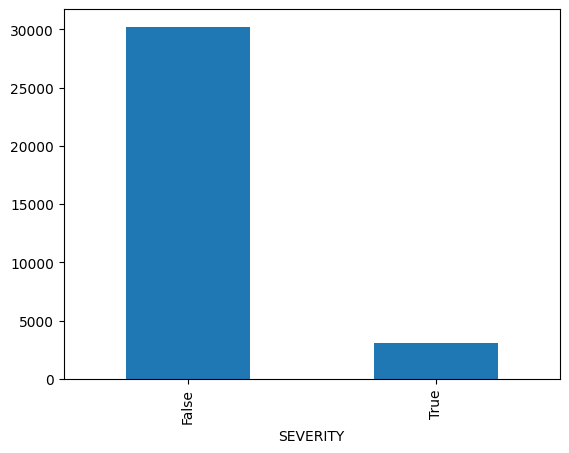

In [ ]:
df['SEVERITY'].value_counts().plot(kind='bar')

In [ ]:
def isRoadWet(description):
  if "WET" in description or "ICE" in description:
      return True
  else:
    return False
df["WET_ROAD"] = df["ROADWAY_SURFACE_COND"].apply(isRoadWet)

<Axes: xlabel='WET_ROAD'>

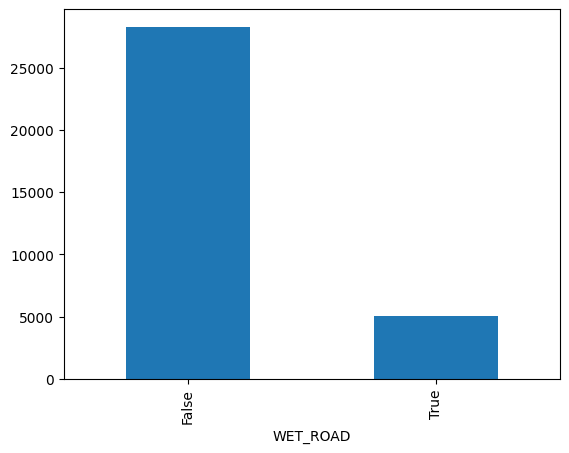

In [ ]:
df['WET_ROAD'].value_counts().plot(kind='bar')

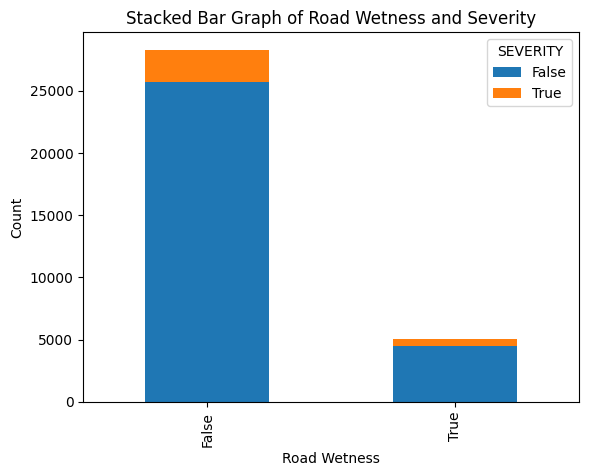

In [ ]:
subset_df = df[['WET_ROAD', 'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby(['WET_ROAD', 'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index='WET_ROAD', columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Road Wetness')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Road Wetness and Severity')
plt.show()

In [ ]:
df['WEATHER_CONDITION'].unique()

array(['CLEAR', 'SNOW', 'RAIN', 'UNKNOWN', 'CLOUDY/OVERCAST',
       'FOG/SMOKE/HAZE', 'BLOWING SNOW', 'FREEZING RAIN/DRIZZLE', 'OTHER',
       'SEVERE CROSS WIND GATE', 'SLEET/HAIL', 'BLOWING SAND, SOIL, DIRT'],
      dtype=object)

In [ ]:
df["CLEAR_WEATHER"] = df['WEATHER_CONDITION'] == "CLEAR"

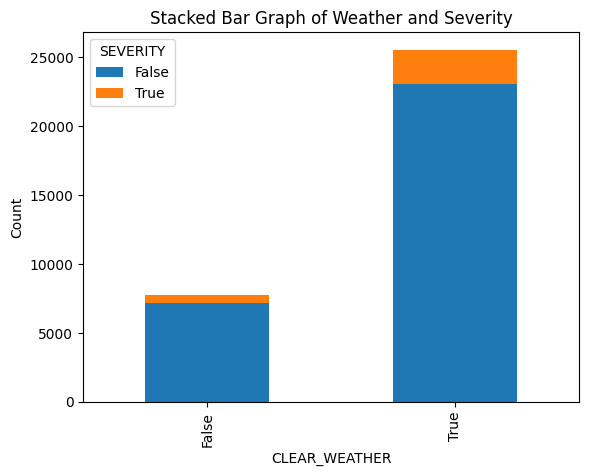

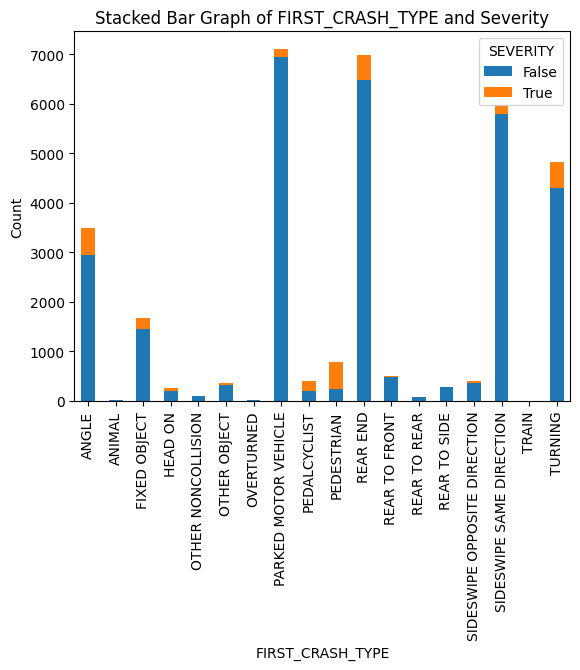

In [ ]:
variable = 'CLEAR_WEATHER'
subset_df = df[[variable,'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby([variable ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index=variable, columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Weather and Severity')
plt.show()
subset_df = df[['FIRST_CRASH_TYPE','SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby(['FIRST_CRASH_TYPE' ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index='FIRST_CRASH_TYPE', columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('FIRST_CRASH_TYPE')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of FIRST_CRASH_TYPE and Severity')
plt.show()

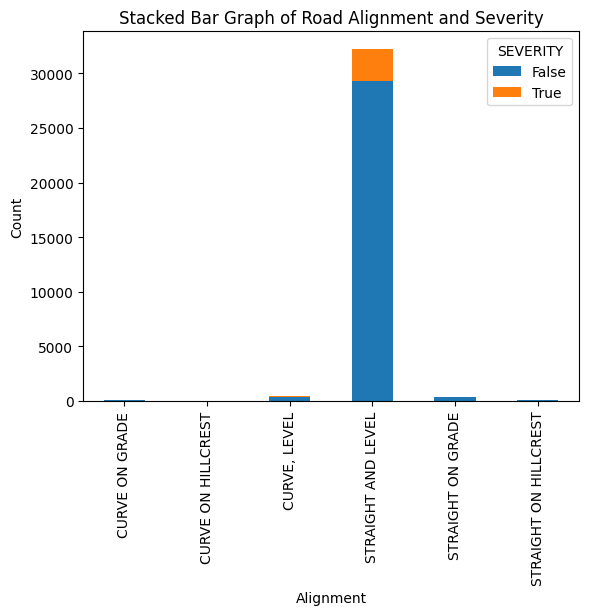

In [ ]:
subset_df = df[['ALIGNMENT', 'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby(['ALIGNMENT', 'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index='ALIGNMENT', columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Road Alignment and Severity')
plt.show()

In [ ]:
def isStraightCrash (alignment):
  return "STRAIGHT" in alignment

df["CRASH_ALIGNMENT"] = df["ALIGNMENT"].apply(isStraightCrash)

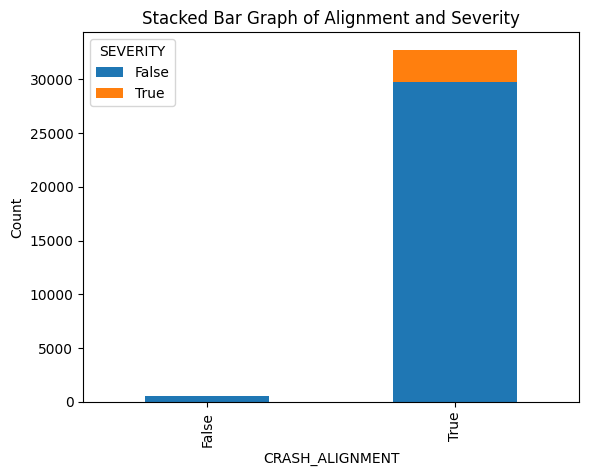

In [ ]:
variable = 'CRASH_ALIGNMENT'
subset_df = df[[variable,'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby([variable ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index=variable, columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Alignment and Severity')
plt.show()

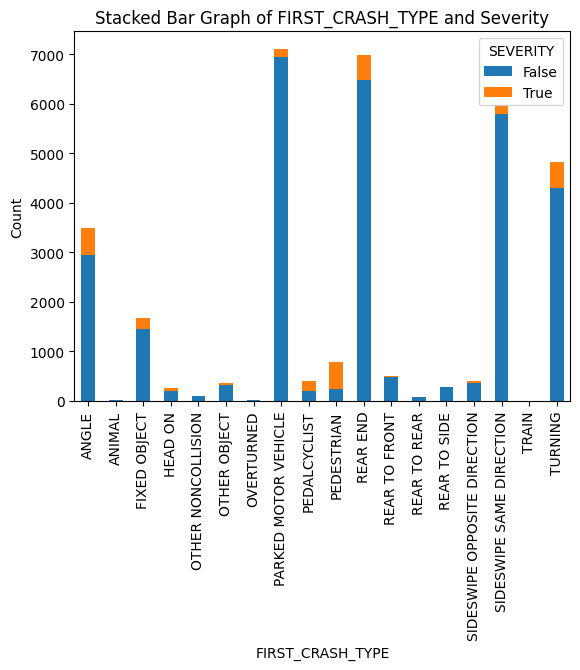

In [ ]:
df['FIRST_CRASH_TYPE']
subset_df = df[['FIRST_CRASH_TYPE','SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby(['FIRST_CRASH_TYPE' ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index='FIRST_CRASH_TYPE', columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('FIRST_CRASH_TYPE')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of FIRST_CRASH_TYPE and Severity')
plt.show()

In [ ]:

listOfFirst_Crash_Type = list(df["FIRST_CRASH_TYPE"].unique())

In [ ]:
listOfFirst_Crash_Type[11]

'PEDALCYCLIST'

In [ ]:
df["FIRST_CRASH_TYPE"].unique()

array(['ANGLE', 'REAR END', 'PARKED MOTOR VEHICLE',
       'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN', 'FIXED OBJECT',
       'TURNING', 'REAR TO FRONT', 'HEAD ON', 'REAR TO SIDE',
       'SIDESWIPE OPPOSITE DIRECTION', 'PEDALCYCLIST', 'OTHER OBJECT',
       'ANIMAL', 'REAR TO REAR', 'OTHER NONCOLLISION', 'OVERTURNED',
       'TRAIN'], dtype=object)

In [ ]:
def detectCrashType (description):
  return listOfFirst_Crash_Type.index(description)

df["MOTOR_VEHICLE_CRASH"] = df['FIRST_CRASH_TYPE'].apply(detectCrashType)

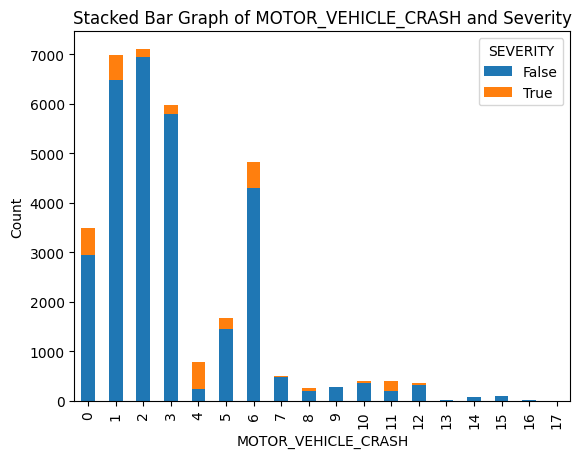

In [ ]:
variable = 'MOTOR_VEHICLE_CRASH'
subset_df = df[[variable,'SEVERITY']]

variable_counts = subset_df.groupby([variable ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = variable_counts.pivot(index=variable, columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Stacked Bar Graph of MOTOR_VEHICLE_CRASH and Severity')
plt.show()

In [ ]:
df['CRASH_HOUR'].unique()

array([19., 18., 14., 23., 12.,  8., 17., 16., 15., 13., 10.,  0.,  6.,
        5., 22., 11., 21.,  9., 20.,  1.,  7.,  2.,  3.,  4.])

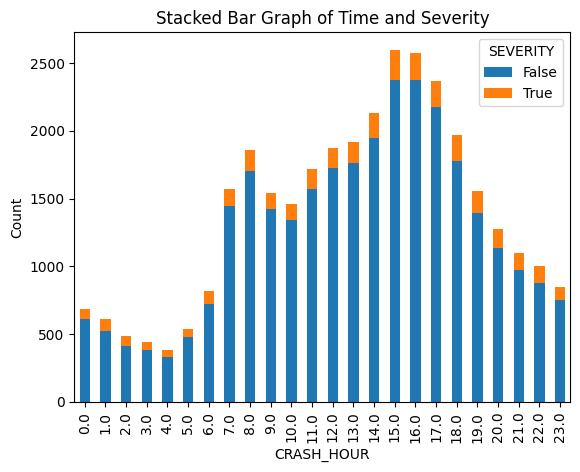

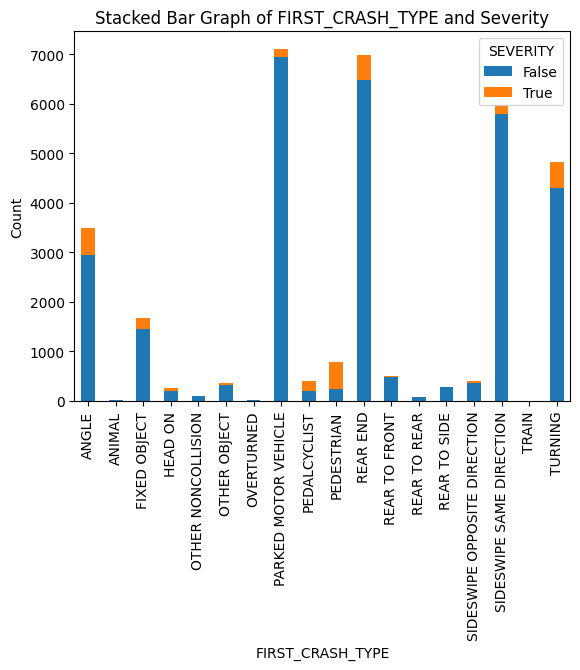

In [ ]:
variable = 'CRASH_HOUR'
subset_df = df[[variable,'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby([variable ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index=variable, columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Time and Severity')
plt.show()
subset_df = df[['FIRST_CRASH_TYPE','SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby(['FIRST_CRASH_TYPE' ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index='FIRST_CRASH_TYPE', columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('FIRST_CRASH_TYPE')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of FIRST_CRASH_TYPE and Severity')
plt.show()

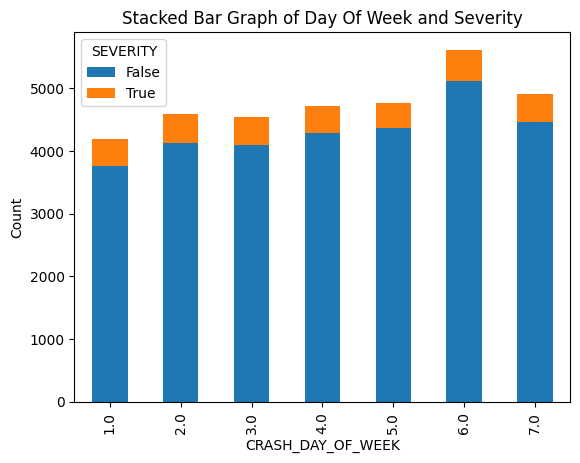

In [ ]:
variable = 'CRASH_DAY_OF_WEEK'
subset_df = df[[variable,'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby([variable ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index=variable, columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Day Of Week and Severity')
plt.show()

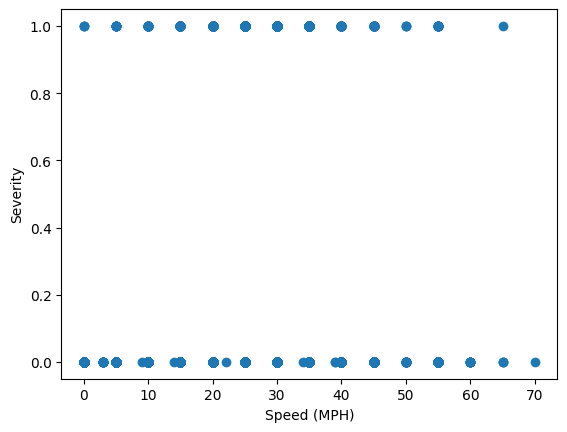

In [ ]:
plt.scatter(df['POSTED_SPEED_LIMIT'], df["SEVERITY"])
plt.xlabel("Speed (MPH)")
plt.ylabel("Severity")
plt.show()


In [ ]:
df["POSTED_SPEED_LIMIT"].unique()

array([30, 50, 15, 25, 10, 35, 20, 55, 45,  5, 40,  0, 60,  3, 65, 39,  9,
       22, 70, 14, 34])

Text(0.5, 1.0, 'Stacked Bar Graph of Time and Severity')

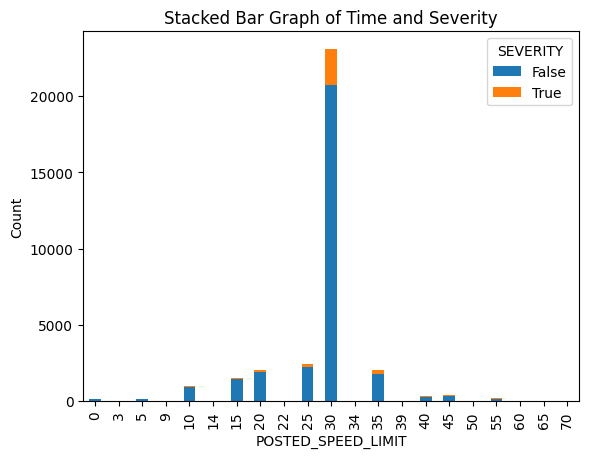

In [ ]:
variable = 'POSTED_SPEED_LIMIT'
subset_df = df[[variable,'SEVERITY']]

# Count the occurrences of each combination of precipitationRating and Severity
precipitationSeverity_counts = subset_df.groupby([variable ,'SEVERITY']).size().reset_index(name='count')

# Pivot the DataFrame to get the counts of each combination
pivot_df = precipitationSeverity_counts.pivot(index=variable, columns='SEVERITY', values='count').fillna(0)

# Plot the stacked bar graph
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Time and Severity')

<Axes: xlabel='CRASH_HOUR', ylabel='POSTED_SPEED_LIMIT'>

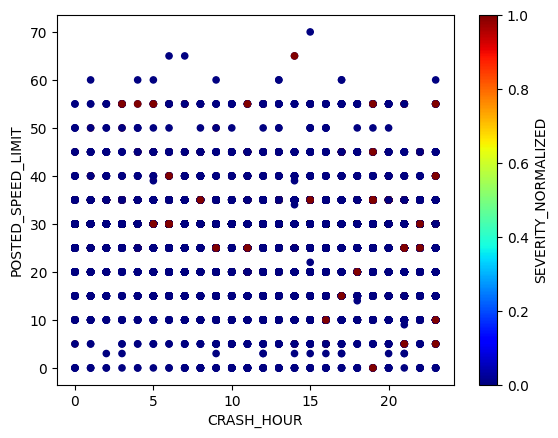

In [ ]:
def normalizeFeature (boolean):
  if boolean == True:
    return 1
  else:
    return 0
df["SEVERITY_NORMALIZED"] = df["SEVERITY"].apply(normalizeFeature)
df.plot.scatter(x = "CRASH_HOUR", y= "POSTED_SPEED_LIMIT", c = "SEVERITY_NORMALIZED", colormap = "jet")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 0 to 35713
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33312 non-null  object 
 1   CRASH_DATE                     33312 non-null  object 
 2   POSTED_SPEED_LIMIT             33312 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         33312 non-null  object 
 4   DEVICE_CONDITION               33312 non-null  object 
 5   WEATHER_CONDITION              33312 non-null  object 
 6   LIGHTING_CONDITION             33312 non-null  object 
 7   FIRST_CRASH_TYPE               33312 non-null  object 
 8   TRAFFICWAY_TYPE                33312 non-null  object 
 9   ALIGNMENT                      33312 non-null  object 
 10  ROADWAY_SURFACE_COND           33312 non-null  object 
 11  ROAD_DEFECT                    33312 non-null  object 
 12  REPORT_TYPE                    33312 non-null  obje

In [ ]:
df['DAMAGE'].unique()

array(['OVER $1,500', '$501 - $1,500', '$500 OR LESS'], dtype=object)

<Axes: xlabel='DAMAGE'>

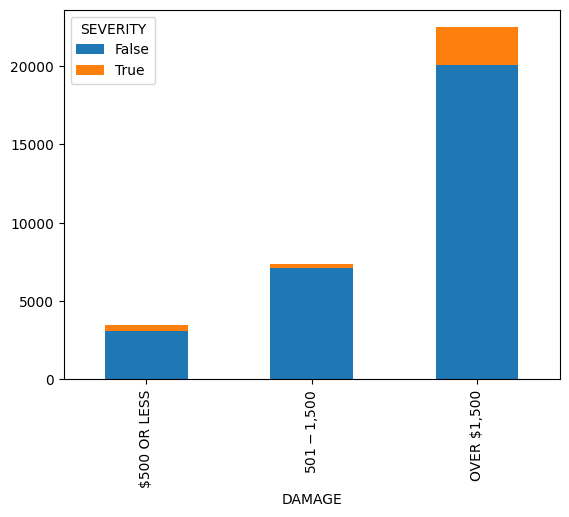

In [ ]:

df_stacked = df.groupby(['DAMAGE', 'SEVERITY']).size().unstack('SEVERITY').fillna(0)

# Plot the stacked bar chart
df_stacked.plot(kind='bar', stacked=True)

In [ ]:
df["MAX_DAMAGED"] = df['DAMAGE'] == "OVER $1,500"

<Axes: xlabel='CRASH_DAY_OF_WEEK', ylabel='CRASH_HOUR'>

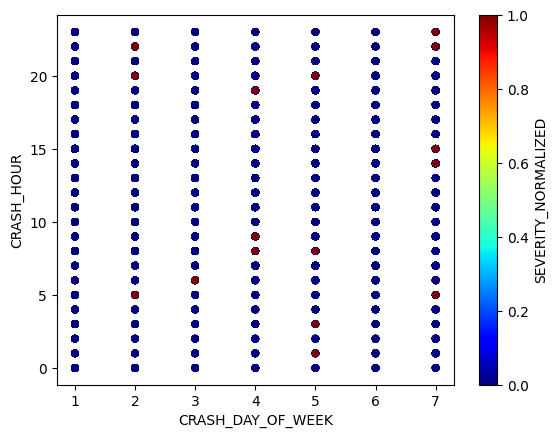

In [ ]:
df.plot.scatter(x= "CRASH_DAY_OF_WEEK", y = "CRASH_HOUR", c = "SEVERITY_NORMALIZED", colormap = "jet")

In [ ]:
df = pd.get_dummies(df, columns=['FIRST_CRASH_TYPE'])

In [ ]:
df["REAR_CRASH"] =df["REAR_CRASH"] = (
    df["FIRST_CRASH_TYPE_REAR END"] |
    df["FIRST_CRASH_TYPE_REAR TO FRONT"] |
    df["FIRST_CRASH_TYPE_REAR TO SIDE"] |
    df["FIRST_CRASH_TYPE_REAR TO REAR"]
)


In [ ]:
df["PEDESTRIAN_CYCLIST_CRASH"] = (df["FIRST_CRASH_TYPE_PEDESTRIAN"] | df["FIRST_CRASH_TYPE_PEDALCYCLIST"])

In [ ]:
df["SIDESWIPE_CRASH"] = (df["FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION"] | df["FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION"])

In [ ]:
df["STATIONARY_CRASH"] = (df["FIRST_CRASH_TYPE_FIXED OBJECT"] | df['FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE'])


In [ ]:
df["OTHER_CRASH"] = (df["FIRST_CRASH_TYPE_TRAIN"] |
                     df["FIRST_CRASH_TYPE_OTHER OBJECT"] |
                     df["FIRST_CRASH_TYPE_OTHER NONCOLLISION"] |
                     df["FIRST_CRASH_TYPE_ANIMAL"])

In [ ]:
df.rename(columns={"FIRST_CRASH_TYPE_ANGLE": "ANGLE_CRASH", "FIRST_CRASH_TYPE_TURNING": "TURNING_CRASH","FIRST_CRASH_TYPE_HEAD ON":"HEAD_ON_CRASH"}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33312 entries, 0 to 35713
Data columns (total 63 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   CRASH_RECORD_ID                                33312 non-null  object 
 1   CRASH_DATE                                     33312 non-null  object 
 2   POSTED_SPEED_LIMIT                             33312 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE                         33312 non-null  object 
 4   DEVICE_CONDITION                               33312 non-null  object 
 5   WEATHER_CONDITION                              33312 non-null  object 
 6   LIGHTING_CONDITION                             33312 non-null  object 
 7   TRAFFICWAY_TYPE                                33312 non-null  object 
 8   ALIGNMENT                                      33312 non-null  object 
 9   ROADWAY_SURFACE_COND                           33312 no

In [ ]:
features = df[["CRASH_HOUR", "WET_ROAD", "POSTED_SPEED_LIMIT", "MAX_DAMAGED",  "ANGLE_CRASH", "STATIONARY_CRASH", "REAR_CRASH", "HEAD_ON_CRASH", "TURNING_CRASH", "SIDESWIPE_CRASH", "PEDESTRIAN_CYCLIST_CRASH"]]

labels = df['SEVERITY']

In [ ]:
import seaborn as sns



In [ ]:
data = pd.concat([features, labels], axis=1)



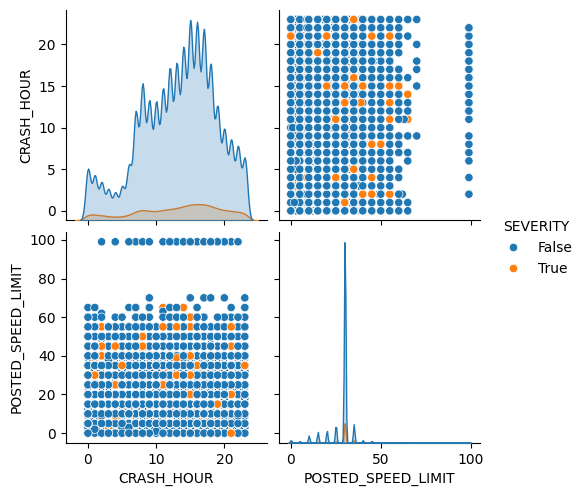

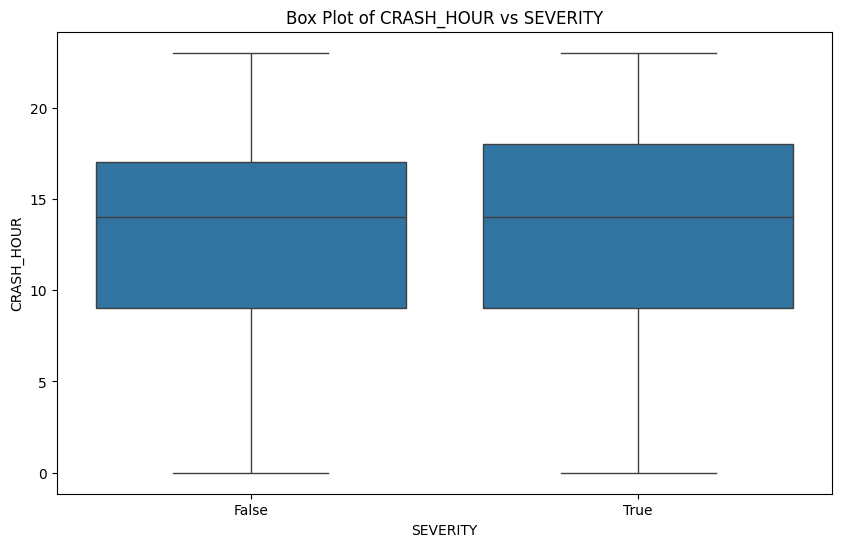

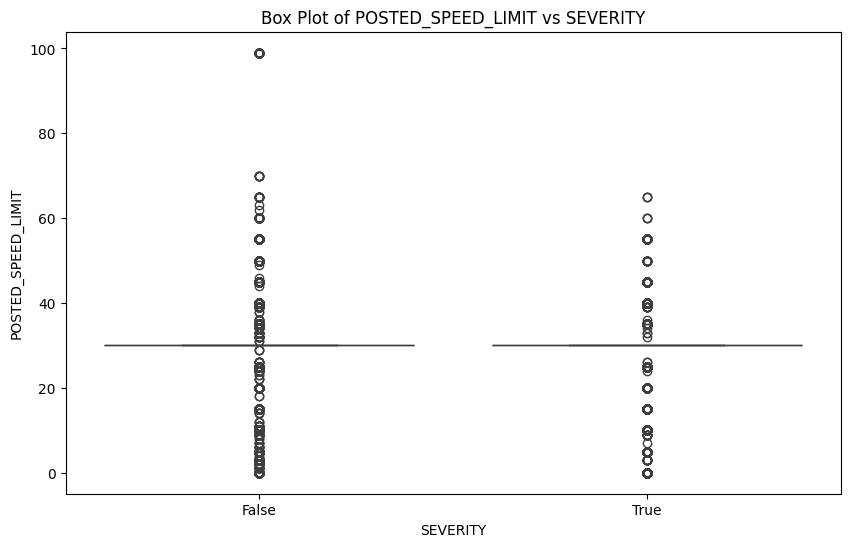

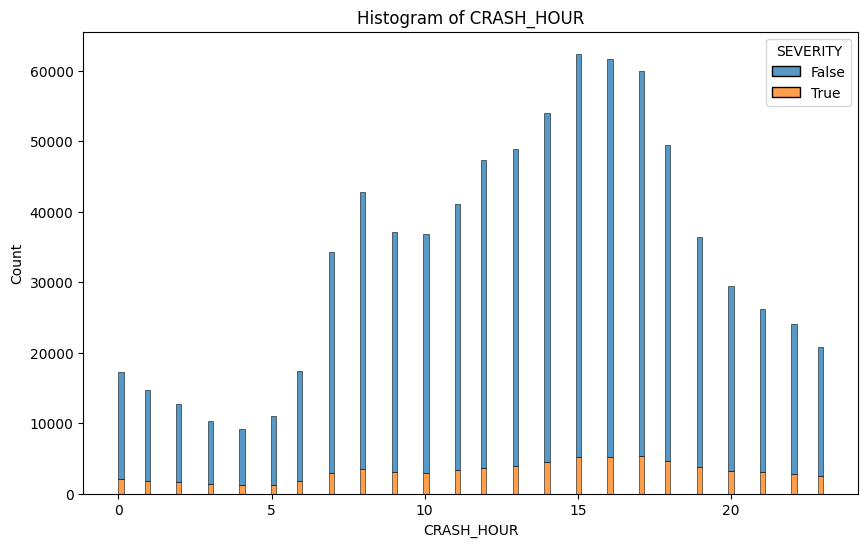

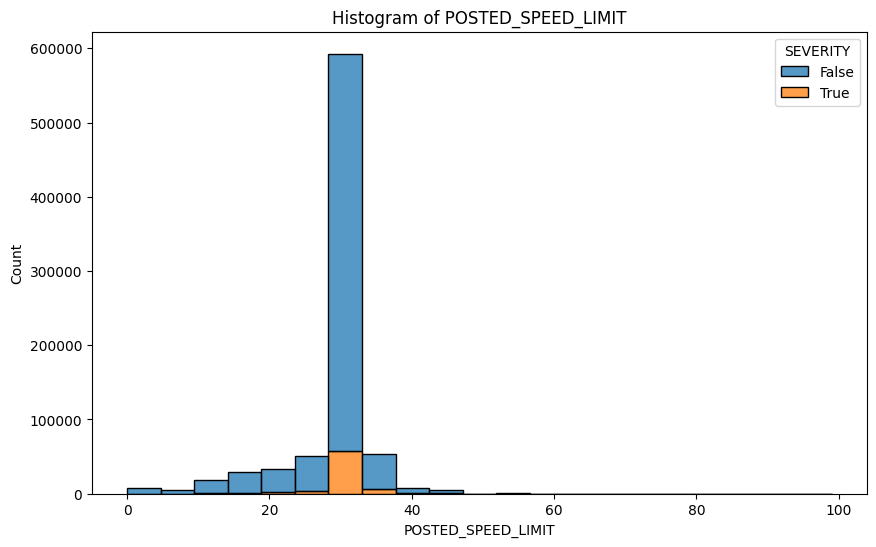

In [ ]:
# Plotting scatter plots for numerical features
numerical_features = ['CRASH_HOUR', 'POSTED_SPEED_LIMIT']
sns.pairplot(data, hue='SEVERITY', vars=numerical_features)
plt.show()
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='SEVERITY', y=feature, data=data)
    plt.title(f'Box Plot of {feature} vs SEVERITY')
    plt.show()

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=feature, hue='SEVERITY', multiple='stack')
    plt.title(f'Histogram of {feature}')
    plt.show()

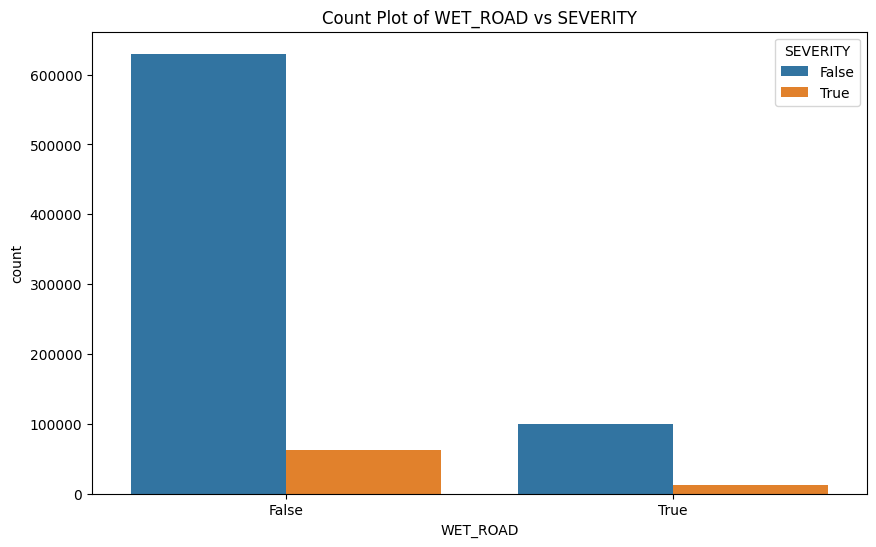

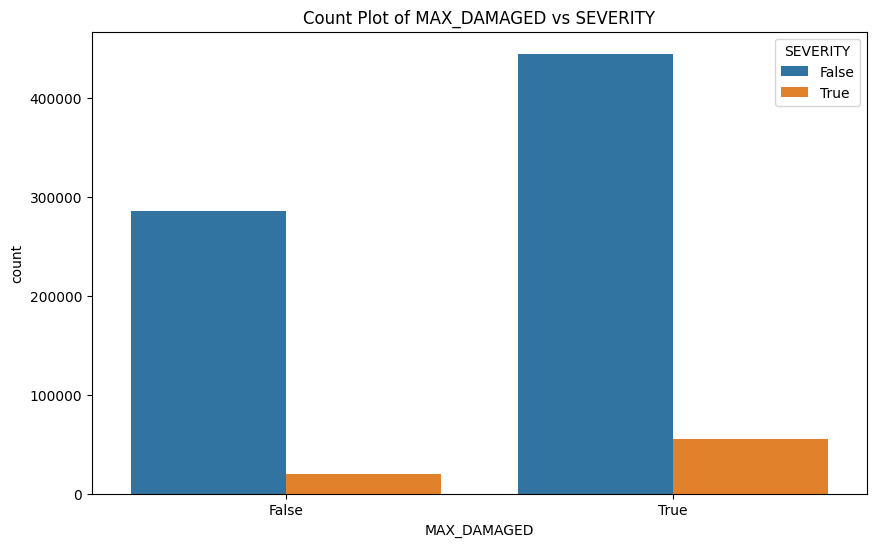

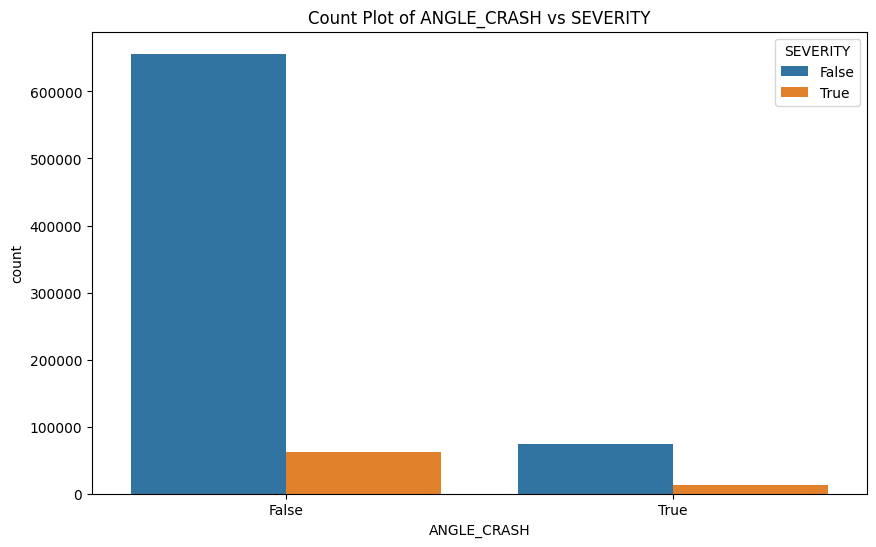

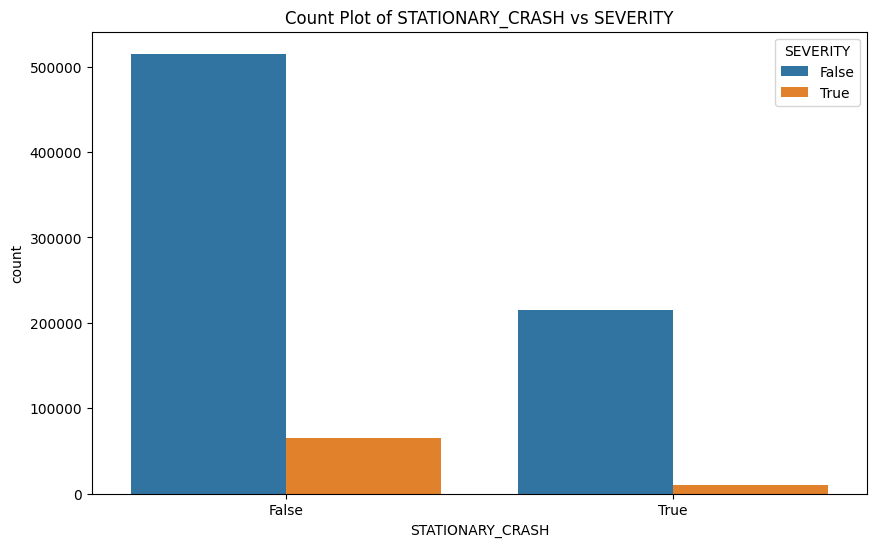

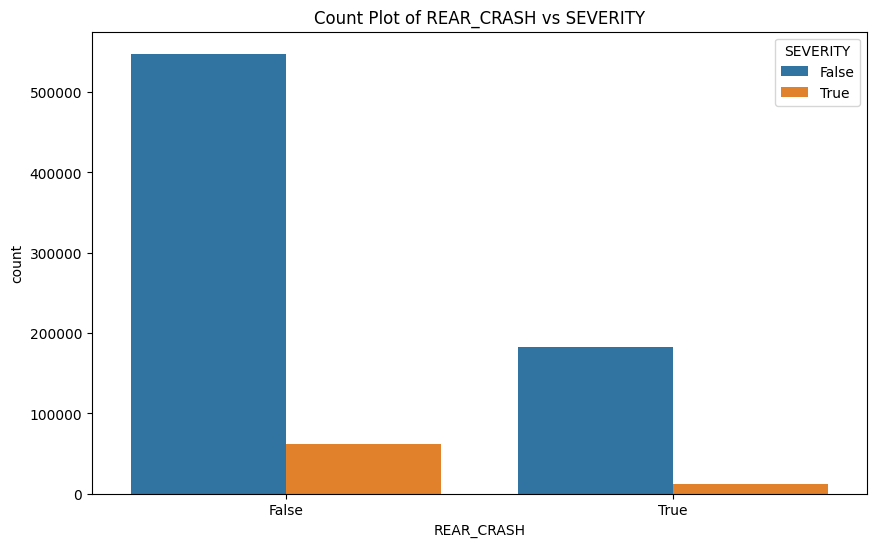

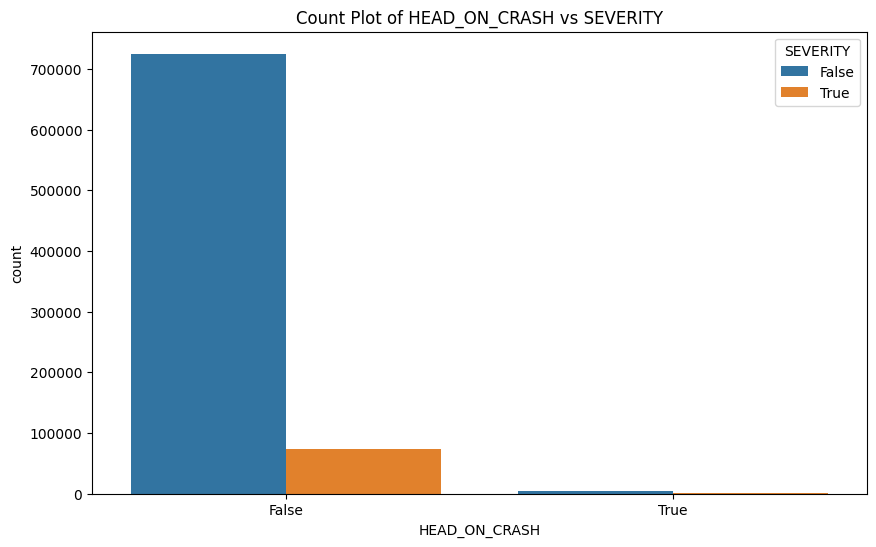

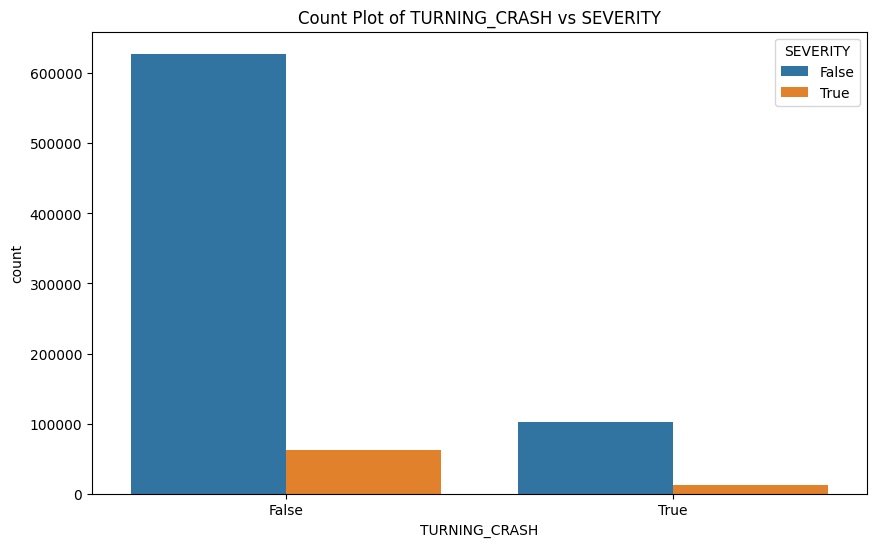

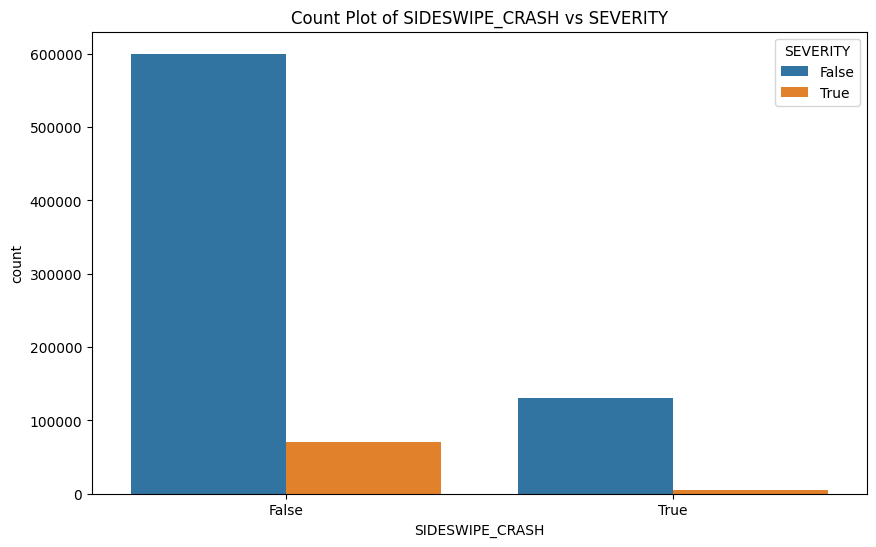

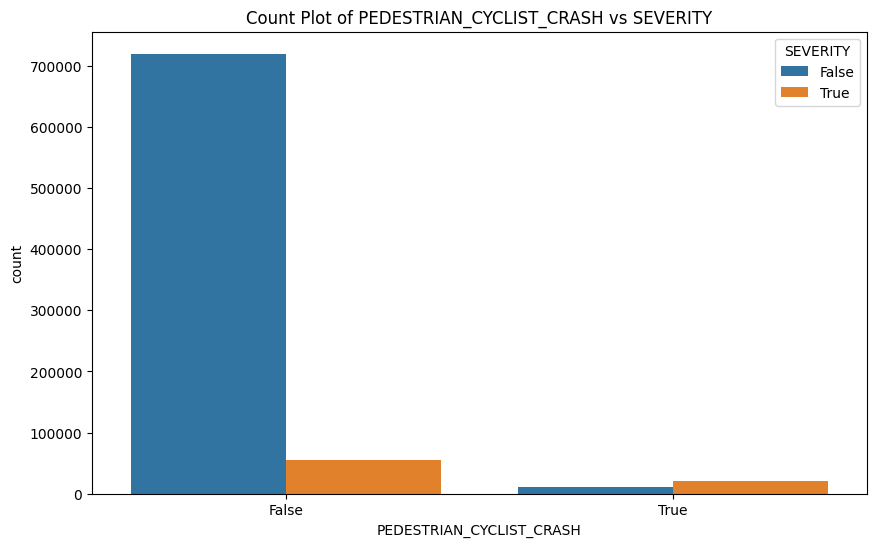

In [ ]:
categorical_features = ["WET_ROAD", "MAX_DAMAGED", "ANGLE_CRASH", "STATIONARY_CRASH", "REAR_CRASH", "HEAD_ON_CRASH", "TURNING_CRASH", "SIDESWIPE_CRASH", "PEDESTRIAN_CYCLIST_CRASH"]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='SEVERITY', data=data)
    plt.title(f'Count Plot of {feature} vs SEVERITY')
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
features, labels, test_size=0.2)

In [ ]:
X_train

,CRASH_HOUR,WET_ROAD,POSTED_SPEED_LIMIT,MAX_DAMAGED,ANGLE_CRASH,STATIONARY_CRASH,REAR_CRASH,HEAD_ON_CRASH,TURNING_CRASH,SIDESWIPE_CRASH,PEDESTRIAN_CYCLIST_CRASH
23660,1,False,15,True,False,True,False,False,False,False,False
704342,19,False,40,False,False,False,False,False,False,True,False
514014,17,False,30,True,False,True,False,False,False,False,False
353025,16,False,30,False,False,False,True,False,False,False,False
421300,8,False,30,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
447488,10,False,30,True,False,True,False,False,False,False,False
204046,20,False,30,True,False,False,True,False,False,False,False
659756,16,False,30,True,False,False,True,False,False,False,False
134156,15,False,15,False,False,True,False,False,False,False,False


In [ ]:
y_train

23660     False
704342    False
514014    False
353025    False
421300    False
          ...  
447488     True
204046    False
659756    False
134156    False
654999    False
Name: SEVERITY, Length: 644218, dtype: bool

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_std = std_scaler.fit_transform(X_train)

X_test_std = std_scaler.transform(X_test)


In [ ]:
model.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test_std)

In [ ]:
pred

array([False, False, False, ..., False, False, False])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96    145803
        True       0.66      0.25      0.36     15252

    accuracy                           0.92    161055
   macro avg       0.79      0.62      0.66    161055
weighted avg       0.90      0.92      0.90    161055



In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_pred_proba

array([[0.00374715, 0.99625285],
       [0.28435487, 0.71564513],
       [0.00138026, 0.99861974],
       ...,
       [0.00516155, 0.99483845],
       [0.00355841, 0.99644159],
       [0.00783786, 0.99216214]])

In [ ]:
accuracy_score(y_test, pred)

0.9167737729347117

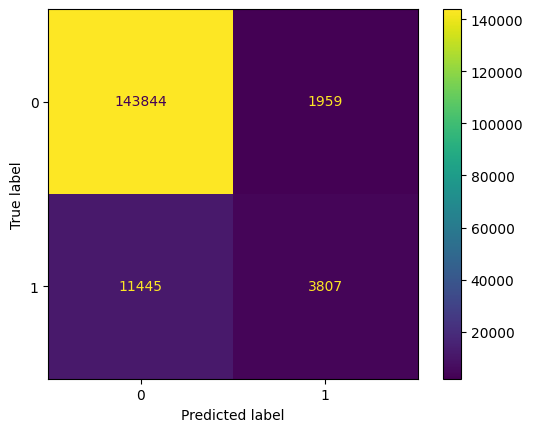

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred,
display_labels = ['0', '1'])

plt.show()


In [ ]:
#data is normalized with LR instead of standardized
model = LogisticRegression()
from sklearn.preprocessing import MinMaxScaler
norm_scaler = MinMaxScaler()

X_train_norm = norm_scaler.fit_transform(X_train)

X_test_norm = norm_scaler.transform(X_test)



In [ ]:
model.fit(X_train_norm, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test_norm)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96    145803
        True       0.66      0.25      0.36     15252

    accuracy                           0.92    161055
   macro avg       0.79      0.62      0.66    161055
weighted avg       0.90      0.92      0.90    161055



In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
accuracy_score(y_test, pred)

0.9167737729347117

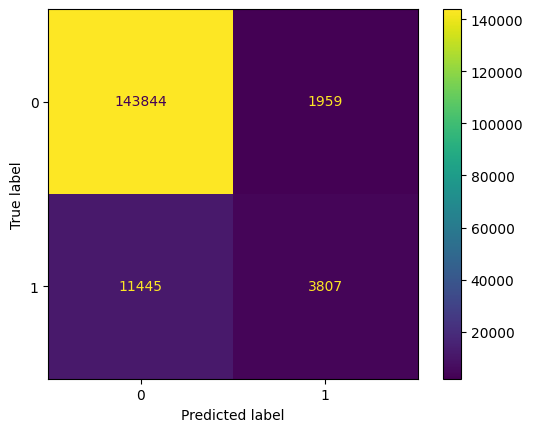

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred,
display_labels = ["0", "1"])

plt.show()

In [ ]:
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended
!pip install nbconvert

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to pdf '/content/drive/MyDrive/US_Accident_Severity_Prediction_Model.ipynb'


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,090 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,525 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security